In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn import tree





# Regression

<h1>Question 1</h1>
Write a function, <i>coeffReport</i> that takes a linear model as its argument, and prints a "coefficient report", as we did in the previous lab. That is, print the feature names and coefficients with the 3 highest values, the 3 lowest values, and the 3 values closest to zero. Below is the beginning of the function definition -- you should complete this.


In [7]:
def coeffReport(linearModel, featureNames):

    coefs=linearModel.coef_ 

    sorted_coef=list(zip(list(featureNames),coefs))
    # I create a variable that list the zipped 2 list of the features with its respective coeficients 

    sorted_coef_value=sorted(list(zip(list(featureNames,coef[0]))), key=lambda x:x[1],reverse=True)
    
    sorted_coef_abs=sorted(list(zip(list(featureNames,coefs))), key=lambda x:abs(x[1]))

    most_informative_coef=sorted_coef_value[:3]
    least_informative_coef=sorted_coef_value[-3:]
    abs_informative_coef=sorted_coef_abs[:3]

    print("\nLowest Coefficients ")
    print(least_informative_coef)

    print("\nHighest Coefficients ")
    print(most_informative_coef)

    print("\nCoefficients Closest to Zero ")
    print(abs_informative_coef)







In [8]:
def coeffReport1(linearModel, featureNames):

    coefs=linearModel.coef_ 

    """ The function is taking the coefficient of each feauture, therefore, understanding how important each feature is for the model
    and then printing the highst, lowest and the closest to zero"""

    sorted_coef=list(zip(list(featureNames),coefs)) #I didnt use it afterwards
    
    # I create a variable that list the zipped 2 list of the features with its respective coeficients 
    # I use list(feautreNames) in order to create a list of the feature name
    # I use Reverse=True so it sorted from the from smallest to highest

    sorted_coef_value=sorted(list(zip(list(featureNames),coefs)), key=lambda x:x[1], reverse=True)
    
    sorted_coef_abs=sorted(list(zip(list(featureNames),coefs)), key=lambda x:abs(x[1]), reverse=True )


    # Like this I am just going to the last 3 coefs and printing them like a list
    print("\nLowest Coefficients ")
    for i in sorted_coef_value[-3:]:

        print(i)


    # Like this I am just going to the first 3 coefs and printing them like a list

    print("\nHighst Coefficients ")
    for i in sorted_coef_value[:3]:

        print(i)


    # Like this I am just going to the last 3 coefs and printing them like a list

    print("\nCoefficients Closest to Zero ")
    for i in sorted_coef_abs[-3:]:

        print(i)

    


In [9]:
from sklearn.datasets import fetch_california_housing

## the code below about ssl is because of a possible error in data access
## if you get the error you should uncomment it
#import ssl

#try:
#    _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#    pass
#else:
#    ssl._create_default_https_context = _create_unverified_https_context



housing = fetch_california_housing()


<h1>Question 2</h1>
Construct a LinearRegression model for the housing data. Report on the train and test score. Use the <i>coeffReport</i> function to report on the feature coefficients.

In [10]:
print("HERE I AM CHECKING THE INFO THAT IS INSIDE THE DATASET   \n\n")

print("Housing.keys():\n", housing.keys())
print("\nShape of Housing dataset", housing.data.shape)

#The keys will show the different type of information of the DataSet --> housing.keys()
#For the shape you always print "name of the dataset".data because is where sklearn save the actual information of the DataSet

HERE I AM CHECKING THE INFO THAT IS INSIDE THE DATASET   


Housing.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Shape of Housing dataset (20640, 8)


In [11]:
#Stratify is making sure that the split is than 75%/25% by label as well and specifying the label column


X_train, X_test, y_train, y_test = train_test_split(housing.data , housing.target, random_state=0)

Linear_reg= LinearRegression().fit(X_train, y_train)

print("Accuracy of the Linear Regression, on the training set: {:.3f}".format(Linear_reg.score(X_train, y_train)))
print("Accuracy of the Linear Regression, on the test set: {:.3f}".format(Linear_reg.score(X_test, y_test)))

#The score will represent the sum of squared differences divided by the amount of sample for both training & test set, 


coeffReport1(Linear_reg,housing.feature_names)

Accuracy of the Linear Regression, on the training set: 0.611
Accuracy of the Linear Regression, on the test set: 0.591

Lowest Coefficients 
('AveRooms', -0.10331117273737225)
('Latitude', -0.41735328390925386)
('Longitude', -0.43061446208860105)

Highst Coefficients 
('AveBedrms', 0.6167301519277008)
('MedInc', 0.4390910418774257)
('HouseAge', 0.009598646648347135)

Coefficients Closest to Zero 
('HouseAge', 0.009598646648347135)
('AveOccup', -0.00448838256416237)
('Population', -7.632751973627935e-06)


<h1>Question 3</h1>
Construct a Ridge model for this data. Report on the train and test score, and use the <i>coeffReport</i> function to report on the feature coefficients.

In [12]:

ridge= Ridge().fit(X_train, y_train)

print("Accuracy of the Ridge model, on the training set: {:.3f}".format(Linear_reg.score(X_train, y_train)))
print("Accuracy of the Ridge model, on the test set: {:.3f}".format(Linear_reg.score(X_test, y_test)))


coeffReport1(Linear_reg, housing.feature_names )



Accuracy of the Ridge model, on the training set: 0.611
Accuracy of the Ridge model, on the test set: 0.591

Lowest Coefficients 
('AveRooms', -0.10331117273737225)
('Latitude', -0.41735328390925386)
('Longitude', -0.43061446208860105)

Highst Coefficients 
('AveBedrms', 0.6167301519277008)
('MedInc', 0.4390910418774257)
('HouseAge', 0.009598646648347135)

Coefficients Closest to Zero 
('HouseAge', 0.009598646648347135)
('AveOccup', -0.00448838256416237)
('Population', -7.632751973627935e-06)


<h1>Question 4</h1>
Create a loop to test many different values for the <i>alpha</i> parameter for the Ridge model. Create a list of results, with the test score, train score, and alpha value. Print the list, sorted by test score.


In [13]:
#Without list

print("Ridge regression: effect of alpha regularization parameter\n")

for this_alpha in [0,1,10,20,50,100,10000]:
		linridge = Ridge(alpha = this_alpha, random_state=42).fit(X_train,y_train) #optionally fit(X_train_scaled) if the data is scaled
		r2_train=linridge.score(X_train, y_train)
		r2_test=linridge.score(X_test, y_test)
		coeff_num= np.sum(abs(linridge.coef_)) #sum all the coefficients to see if the alpha push it to zero, therefore, simplier model. 
		
		print("Alpha = {:.2f}\nCoeff: {:.2f}, R-squared training: {:.2f}, R-squared test: {:.2f}\n".format(this_alpha,coeff_num,r2_train,r2_test))


#When alpha is 0 it has the same value 

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
Coeff: 2.02, R-squared training: 0.61, R-squared test: 0.59

Alpha = 1.00
Coeff: 2.02, R-squared training: 0.61, R-squared test: 0.59

Alpha = 10.00
Coeff: 2.00, R-squared training: 0.61, R-squared test: 0.59

Alpha = 20.00
Coeff: 1.99, R-squared training: 0.61, R-squared test: 0.59

Alpha = 50.00
Coeff: 1.94, R-squared training: 0.61, R-squared test: 0.59

Alpha = 100.00
Coeff: 1.88, R-squared training: 0.61, R-squared test: 0.59

Alpha = 10000.00
Coeff: 0.69, R-squared training: 0.55, R-squared test: 0.53



In [14]:
#Option 2 with list

resList = []
for alpha in [0.001,0.01, 0.1, 0.3, 1, 100, 200, 300, 1000, 3000]:
    clf = Ridge(alpha=alpha, random_state=0).fit(X_train, y_train)

    res = (clf.score(X_test, y_test), clf.score(X_train, y_train), alpha)
    resList.append(res)
   
resListSrt = sorted (resList,
                key = lambda e:e[0], reverse=True)

print("     Test    ", "Train  ", "Alpha    ")
for r in resListSrt:
    print("{:9.4f} {:9.4f} {:7.2f}".format (r[0],r[1],r[2]))


     Test     Train   Alpha    
   0.5912    0.6110    0.00
   0.5912    0.6110    0.01
   0.5912    0.6110    0.10
   0.5912    0.6110    0.30
   0.5912    0.6110    1.00
   0.5902    0.6107  100.00
   0.5891    0.6100  200.00
   0.5881    0.6093  300.00
   0.5814    0.6039 1000.00
   0.5663    0.5897 3000.00


# Reflexion on the result

- when alpha is 0 it has the same result the ordinary least-square regression model since there is no L2 penalty value. 
- The biggest the alpha the simplier the model is, therefore, the more underfit the model will be (not performing well at generalizing)

- There is not significant change on the squared (score) value when alpha changes. This can be due two different things:
    1. The amount of training data is relatively bigger than the amount of features in the model, therefore, regularization becomes less important as the amount of training data increases
    2. The scale of the different features is too different and it needs normalization. 

<h1>Question 5</h1>
Create a DecisionTreeRegressor model and fit it to this data. Print the score on train and test data.


In [15]:
dt = DecisionTreeRegressor().fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))



1.0
0.5844099287394493


<h1>Question 6</h1>
Create a RandomForestRegressor model and fit it to this data. Print the score on train and test data.


In [16]:

rf = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))



0.9727159677969947
0.7941678302821006


# Classification

## Question 7
Read the file, telco.csv, and assign all the columns to X, except the column 'Churn', which you assign to y. Then perform a train-test split, setting the parameter: stratify=y.

In [17]:
df=pd.read_csv("3. telco.csv")

df.head(5)


,Unnamed: 0,tenure,Partner,Dependents,gender,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,1,0,0,0,1,29.85,29.85,1,...,0,0,0,0,0,0,0,1,0,No
1,1,34,0,0,1,1,0,56.95,1889.50,0,...,0,0,0,0,1,0,0,0,1,No
2,2,2,0,0,1,1,1,53.85,108.15,0,...,0,0,0,0,0,0,0,0,1,Yes
3,3,45,0,0,1,0,0,42.30,1840.75,1,...,0,0,0,0,1,0,0,0,0,No
4,4,2,0,0,0,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,1,0,Yes


In [18]:
df.shape

(7032, 31)

In [19]:

#X will be de features (All the columns, but the churn)
#y will be the label 


X = df.drop(["Churn"], axis=1)  #Axis=1 = the whole column 
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, random_state=0)

print("shape of X:", X.shape)
print("\nshape of y:", y.shape)


shape of X: (7032, 30)

shape of y: (7032,)


In [20]:
y.shape

(7032,)

## Question 8
Produce a Logistic Regression  Classifier for the telco data. Report training and test results.

In [26]:


log_reg = LogisticRegression(C=1000)  #Eventhoug is not called classifier is used for classification
log_reg.fit(X_train, y_train) 

train_score_not_scaled=log_reg.score(X_train, y_train)
test_score_not_scaled=log_reg.score(X_test, y_test)
print('Accuracy on the training subset: {:.3f}'.format(train_score_not_scaled))
print('Accuracy on the test subset: {:.3f}'.format(test_score_not_scaled))



Accuracy on the training subset: 0.802
Accuracy on the test subset: 0.800


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Results 

It seems that the model is too simple --> underfit. It could be solved by applying a highier C value to make it more complex. So this can be more effective, it might be necesarry to normalized the data

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler() #creating the scaler variable
scaler.fit(X_train) #The scaler need to be trained only in the training data and not in the test data

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #The same scaler as in the training set need to be used
																				 # scaler.transform



In [39]:
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression(C=100).fit(X_train_scaled, y_train) # Fitting the model with the scaled train features
re_score=clf.score(X_test_scaled, y_test) # Fitting the model with the scaled test features

print("The training score without using MinMaxScaler: {:.2f}\nThe test score without using MinMaxscaler: {:.2f}".format(train_score_not_scaled,test_score_not_scaled))
print("The training score without MinMaxScaler: {:.2f}\nThe test score using MinMaxscaler: {:.2f}".format(clf.score(X_train_scaled,y_train),clf.score(X_train_scaled,y_train)))



#There is not siginificant change.


The training score without using MinMaxScaler: 0.80
The test score without using MinMaxscaler: 0.80
The training score without MinMaxScaler: 0.80
The test score using MinMaxscaler: 0.80


## Question 8
Produce a Decision Tree Classifier for the telco data. Report training and test results.

In [32]:

DTc = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(DTc.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(DTc.score(X_test, y_test)))




Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.735


Now construct a decision tree with max_depth of 2, and fit the tree to the training data. Then use the code below to display the tree (note that the model below is called "dtree").


In [33]:
#DTcd is the DecisionTreeClassifier with depth
DTcd = DecisionTreeClassifier(random_state=0,max_depth=2).fit(X_train,y_train)

print('Accuracy on the training subset: {:.3f}'.format(DTcd.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(DTcd.score(X_test, y_test)))


#it looks like overfitting 


Accuracy on the training subset: 0.789
Accuracy on the test subset: 0.792


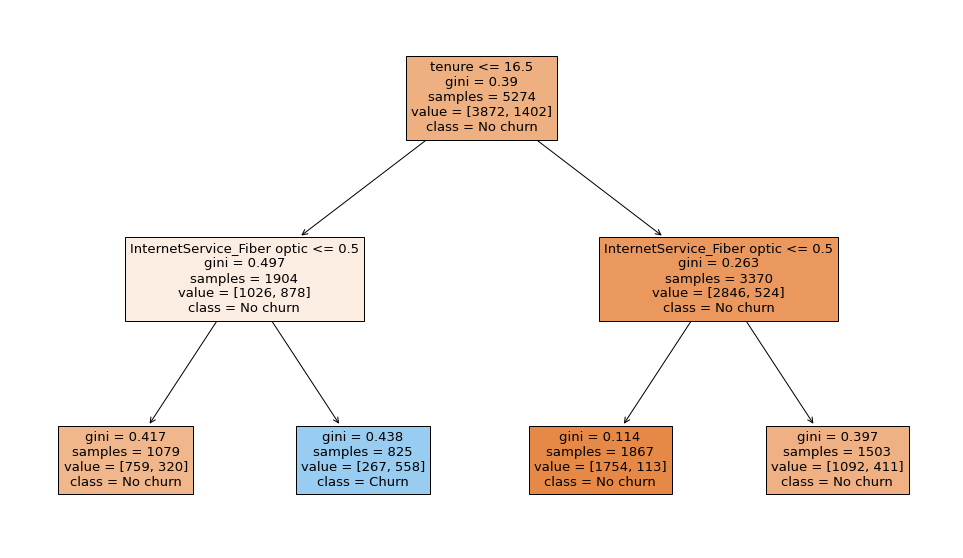

In [38]:
# I need to import Matplotlib & "tree" from sklearn 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html


fig = plt.figure(figsize=(17,10))
_= tree.plot_tree(DTcd, feature_names=X.columns, class_names=["No churn", "Churn"], filled=True)

In [36]:
# In order to save the decision tree use the code below

# fig.savefig("decistion_tree.png")


In [40]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

<h2>Question 10</h2>
Construct a random forest classifier for this data. Report train and test accuracy.

In [138]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier( random_state=0).fit(X,y)


#clf = RandomForestClassifier(n_estimators=120, max_features=8, random_state=0).fit(X,y)


print("Evaluating the Random Forest Classifier \n\nTraining Score: {:.2f}, Test Score:t: {:.2f}\n".format(clf.score(X_train, y_train),clf.score(X_test, y_test)))



Evaluating the Random Forest Classifier 

Training Score: 1.00, Test Score:t: 1.00

